# Harshalkumar Loya & Harshal Talele

   # PART - 1 Descriptive Analysis
   

## a

The Wikipedia page details the covid-19 situation in Ohio state from the very beginning of its outburst, stating the timeline, volume of cases, the response from political and private entities, and its impact on the people's lives and the state's response to other states of USA having comparative population.\
\
The page describes or 'thinks' the response of the state administration was quite positive and lists all the proactive measures and public opinion via news media to support the claim made. Governor DeWine is said to be one of the first state governors to "sound the alarm" and lead from the front even before Ohio had any positive cases. It also mentions how Ohio "was realizing the benefits of early intervention in the pandemic by its government and medical community," with fewer than 1/3 as many cases and "a small fraction of the deaths" as Illinois, Pennsylvania, and Michigan, all nearby comparably-sized states. It also mentions, in brief, the criticism of the policies adopted by the state but gives a hint into how this criticism is politically motivated and comes mostly from covid deniers in the republican party. The results of these measures are also seen in vaccine coverage amongst the population having vaccinated a vast majority of the population.\
\
The Wikipedia page details the cases and deaths as they happened in the state with the help data backed visuals. The overall trend of the cases seen had two major waves in the two years following the initial breakout. The first wave peaked in November-December and then normalcy returned before it was hit with a massive second wave which peaked in January with a daily case of 30000 cases per day. The deaths logically followed the peaks of the cases and were significantly under control in the wave as it was at a similar number even if the caseload was increased to 3x compared to the first wave. Overall, The state recorded a total of 553,461 cases had been reported leading to 31,803 hospitalizations and 7,477 deaths

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import json
import requests

In [322]:
# Load the trainign dataset
data = pd.read_csv("training_data.csv")
data.head(10)

,county,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,...,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
0,Richland,0,0,day_10,363,0.000000,0.000000,0.000000,0.000011,0.000151,...,55.5,7.5,675,41877,23210,90.5,48.3,15.6,103700,0.868085
1,Lawrence,119,0,day_105,256,0.000000,0.000000,0.000000,0.000000,0.000000,...,53.5,6.5,655,42874,23510,92.2,49.3,18.6,101500,0.954027
2,Wayne,49,0,day_90,769,0.000076,0.000370,0.006502,0.000039,0.000000,...,64.0,4.0,762,50383,26658,87.2,55.1,13.0,140100,0.950541
3,Fayette,7,0,day_85,36,0.000000,0.000000,0.000000,0.000000,0.000000,...,59.3,6.3,732,40503,25858,91.3,51.8,17.7,108900,0.940054
4,Trumbull,0,0,day_7,554,0.000000,0.000000,0.000000,0.000046,0.000000,...,56.4,5.9,661,43073,25800,91.7,49.1,17.2,101600,0.885724
5,Clinton,182,0,day_112,71,0.000254,0.000529,0.028169,0.000331,0.000000,...,62.4,6.6,781,46787,25751,92.6,52.6,14.7,123700,0.941699
6,Shelby,0,0,day_1,113,0.000000,0.000000,0.000000,0.000000,0.000000,...,68.1,5.3,776,54550,30213,95.5,56.4,8.9,137800,0.942763
7,Tuscarawas,196,0,day_104,276,0.000085,0.000604,0.007246,0.000105,0.000000,...,62.0,4.9,722,45310,25370,90.3,54.2,13.8,117100,0.968173
8,Champaign,0,0,day_50,39,0.000000,0.000000,0.000000,0.000000,0.000000,...,62.5,7.3,814,50974,27550,93.9,55.3,11.1,126700,0.944725
9,Morrow,7,0,day_94,66,0.000178,0.001479,0.015152,0.000128,0.000000,...,64.2,4.3,821,51993,26935,93.8,55.9,9.7,139400,0.972893


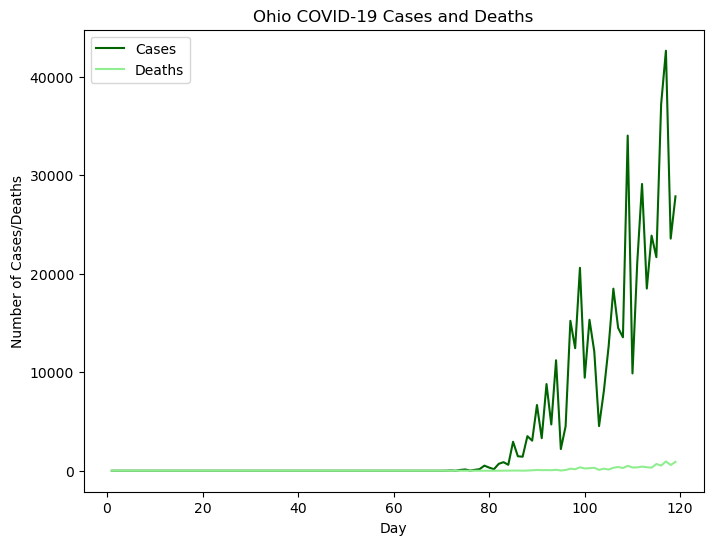

In [323]:
# plot the cases to understand the pattern
data['date'] = data['date_index_converted'].str.replace('day_', '').astype(int)
data.sort_values(by='date', inplace=True)

# group data by date and sum cases and deaths
grouped_data = data.groupby('date').agg({'cases': 'sum', 'deaths': 'sum'})

# create a line plot of cases and deaths over time
plt.plot(grouped_data.index, grouped_data['cases'], color='darkgreen', label='Cases')
plt.plot(grouped_data.index, grouped_data['deaths'], color='lightgreen', label='Deaths')

# set plot attributes
plt.title('Ohio COVID-19 Cases and Deaths')
plt.xlabel('Day')
plt.ylabel('Number of Cases/Deaths')
plt.legend()
plt.show()


## b

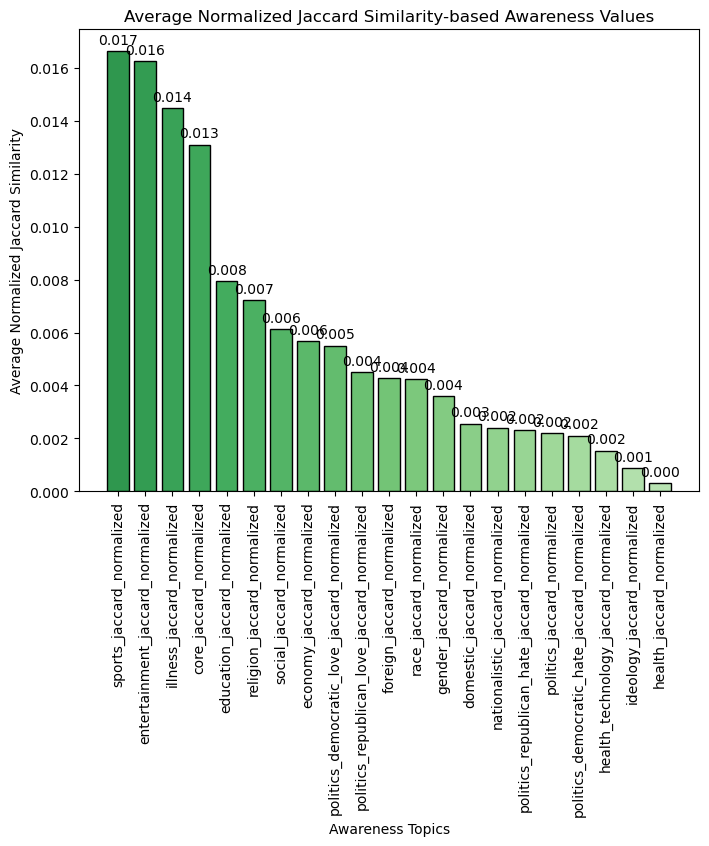

In [324]:
# calculate the mean of all topic awareness variables
mean_awareness = data.loc[:, ['core_jaccard_normalized', 'ideology_jaccard_normalized', 'race_jaccard_normalized', 'economy_jaccard_normalized', 'sports_jaccard_normalized', 'foreign_jaccard_normalized', 'domestic_jaccard_normalized', 'nationalistic_jaccard_normalized', 'politics_democratic_love_jaccard_normalized', 'health_technology_jaccard_normalized', 'education_jaccard_normalized', 'gender_jaccard_normalized', 'religion_jaccard_normalized', 'social_jaccard_normalized', 'politics_republican_love_jaccard_normalized', 'politics_jaccard_normalized', 'entertainment_jaccard_normalized', 'politics_republican_hate_jaccard_normalized', 'politics_democratic_hate_jaccard_normalized', 'health_jaccard_normalized', 'illness_jaccard_normalized']].mean()

# sort the values in descending order
mean_awareness_sorted = mean_awareness.sort_values(ascending=False)

# create color array
color_array = np.linspace(0.7, 0.3, len(mean_awareness_sorted))

# plot the bar chart
fig, ax = plt.subplots()
bars = ax.bar(mean_awareness_sorted.index, mean_awareness_sorted, 
              color=plt.cm.Greens(color_array), edgecolor="black")

# add values above the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  textcoords="offset points", ha='center', va='bottom')

plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=90)
plt.xlabel('Awareness Topics')
plt.ylabel('Average Normalized Jaccard Similarity')
plt.title('Average Normalized Jaccard Similarity-based Awareness Values')
plt.show()

## Interpretations - 

The bars in the graph represent the average normalized Jaccard similarity-based awareness values on each topic. The higher the Jaccard similarity-based awareness score for a topic, the more likely it is that the residents of the county are aware of that topic. \
\
Few of the parameters such as Sports, Entertainment, and Illness have beat the core i.e. general covid-19 awareness, and have managed to be on people's minds despite the disease, displaying how sports and entertainment can as a unifier in a global pandemic.\
\
Issues relating to society, politics, religion, and the economy are fairly in the middle with the awareness score for most of them being less than 0.01.\
\
Discussion around health and health technologies have taken a back seat to be least aware topics of all. This might surprise many as one would expect everybody to talk about nothing but the nitty gritty of the one-in-100-year pandemic facing humanity. But, it is fair to assume that twitter lacks nuanced discussions and sees the world in black and white.

## c

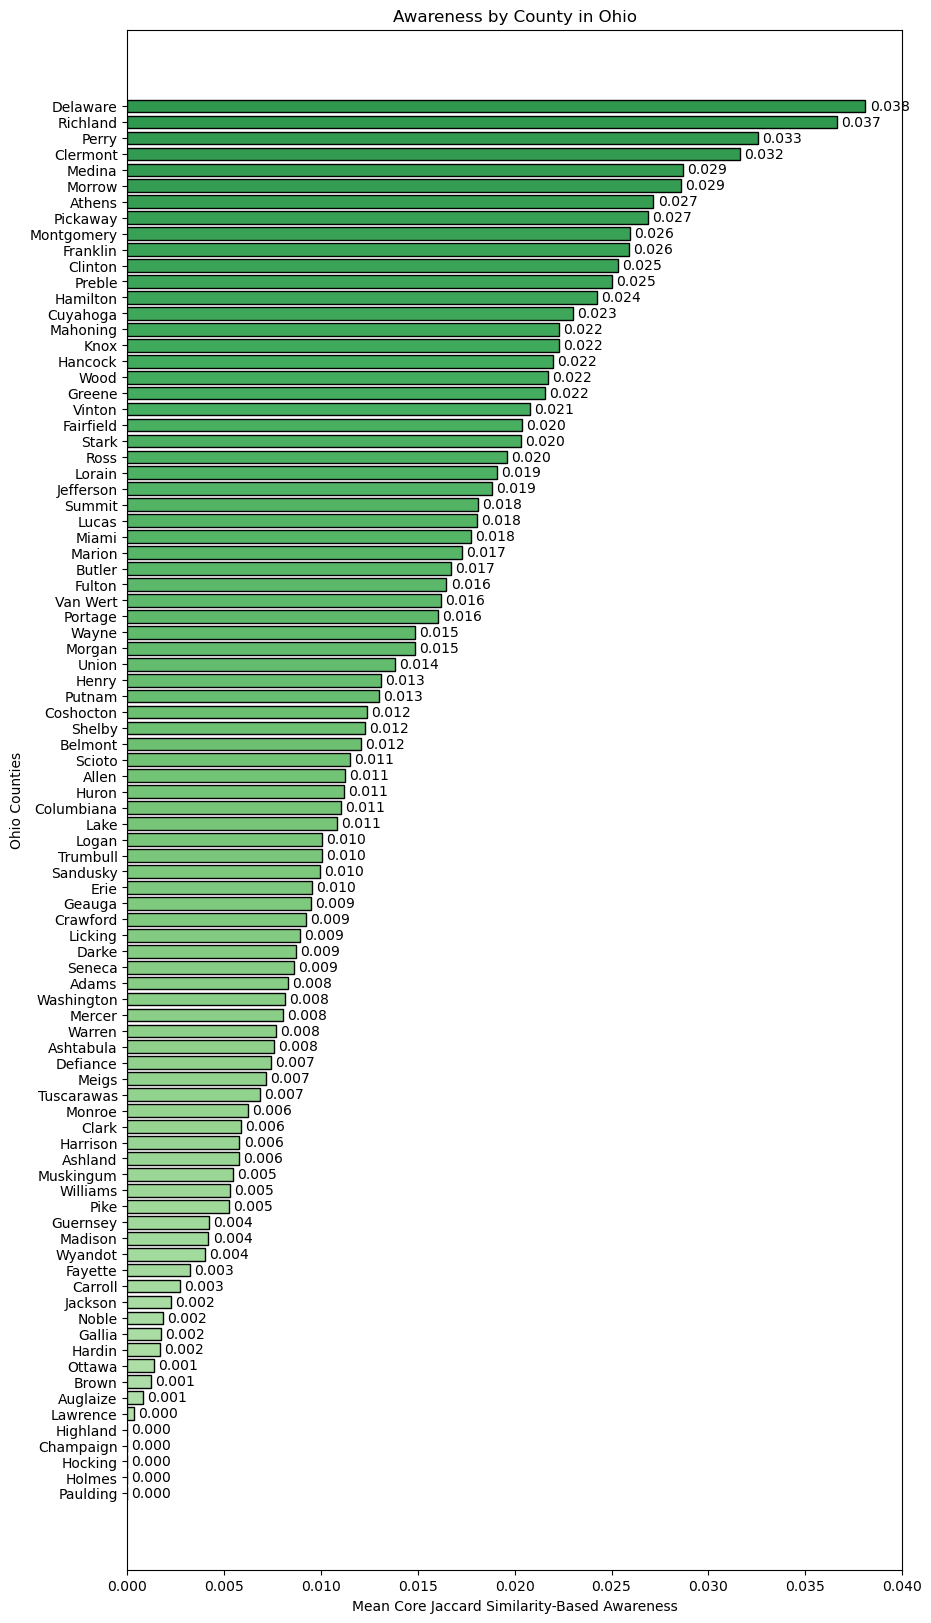

In [325]:
# Calculate the mean core_jaccard_normalized value for each county
county_means = data.groupby('county')['core_jaccard_normalized'].mean()
county_means = county_means.sort_values(ascending=True)

# Create the color array
color_array = np.linspace(0.3, 0.7, len(county_means))

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10,20))
bars = ax.barh(county_means.index, county_means, color=plt.cm.Greens(color_array), edgecolor="black")

# Add values to the right of the bars
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width:.3f}', xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0),  textcoords="offset points", ha='left', va='center')

# Customize the chart
plt.xlabel('Mean Core Jaccard Similarity-Based Awareness')
plt.title('Awareness by County in Ohio')
plt.ylabel('Ohio Counties')
plt.show()


## Interpretations - 

The Bar graph above presents a crucial information on spread of Covid-19 awareness amongst all the counties in Ohio based on their core_jaccard_normalized Jaccard similarity based score. It is evident from the graph that counties such as Delaware, Richland, and Perry have scored the highest on the awareness scores, while counties like Lawrence, Champaign, Hocking, Holmes, and Paulding have a score of zero.\
\
The higher score may be attributed to greater access to internet, educated population and more exposure to mainstream news outlets. The counties with higher score are generally seen to be within or around major cities around Ohio. On the other hand, the counties with low scores are , unsurprisingly, are located remotely and cut-off from the current events. \
\
This graph can act as guiding document for the policy makers in Ohio to target the counties with a minuscule awareness on the disease and ramp up the campaign. It is important to improve the awareness of citizens in all counties, as it can significantly impact the overall health and well being of the state.

## d


In [330]:
# Download GeoJSON file from web
url = 'https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json'
geojson_data = requests.get(url).json()

In [88]:
# Convert GeoJSON to GeoDataFrame
gdf_ohio = gpd.GeoDataFrame.from_features(geojson_data['features'])

# Show GeoDataFrame
print(gdf_ohio.head())
print(gdf_ohio.shape)

                                            geometry          GEO_ID STATE  \
0  POLYGON ((-86.49677 32.34444, -86.71790 32.402...  0500000US01001    01   
1  POLYGON ((-86.57780 33.76532, -86.75914 33.840...  0500000US01009    01   
2  POLYGON ((-85.18413 32.87053, -85.12342 32.772...  0500000US01017    01   
3  POLYGON ((-86.51734 33.02057, -86.51596 32.929...  0500000US01021    01   
4  POLYGON ((-88.13999 34.58170, -88.13925 34.587...  0500000US01033    01   

  COUNTY      NAME    LSAD  CENSUSAREA  
0    001   Autauga  County     594.436  
1    009    Blount  County     644.776  
2    017  Chambers  County     596.531  
3    021   Chilton  County     692.854  
4    033   Colbert  County     592.619  
(3221, 7)


In [244]:
data[['county', 'total_pop']].sort_values(by='total_pop', ascending=False)

,county,total_pop
1227,Cuyahoga,1263189
2562,Cuyahoga,1263189
2947,Cuyahoga,1263189
2689,Cuyahoga,1263189
1917,Cuyahoga,1263189
...,...,...
1573,Vinton,13234
1549,Vinton,13234
1084,Vinton,13234
1303,Vinton,13234


In [262]:
grouped_data = data[['county','cases','deaths']].groupby(['county'], as_index=False).agg('sum')
total_pop_df = data[['county', 'total_pop']].drop_duplicates()
grouped_data = grouped_data.merge(total_pop_df, on='county')
grouped_data

,county,cases,deaths,total_pop
0,Adams,217,0,28229
1,Allen,2723,126,105196
2,Ashland,273,0,53189
3,Ashtabula,2947,81,99777
4,Athens,280,36,64974
...,...,...,...,...
83,Washington,2891,99,61351
84,Wayne,3325,207,115371
85,Williams,189,9,37386
86,Wood,3682,129,128885


In [263]:
ohio_data = gdf_ohio[gdf_ohio['STATE'] == '39']
ohio_data
merged_data = ohio_data.merge(grouped_data, left_on='NAME', right_on='county')
merged_data

,geometry,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,county,cases,deaths,total_pop
0,"POLYGON ((-81.00307 41.42593, -81.00319 41.424...",0500000US39055,39,055,Geauga,County,400.164,Geauga,3059,51,93874
1,"POLYGON ((-83.42105 41.16678, -83.42032 40.991...",0500000US39063,39,063,Hancock,County,531.358,Hancock,623,6,75428
2,"POLYGON ((-83.52023 40.50408, -83.87993 40.538...",0500000US39065,39,065,Hardin,County,470.405,Hardin,889,0,31736
3,"POLYGON ((-82.12620 40.66823, -81.65005 40.668...",0500000US39075,39,075,Holmes,County,422.533,Holmes,266,18,43436
4,"POLYGON ((-82.58181 39.93016, -82.78249 39.939...",0500000US39089,39,089,Licking,County,682.500,Licking,5817,99,168693
...,...,...,...,...,...,...,...,...,...,...,...
83,"POLYGON ((-82.13928 38.86641, -82.18443 38.816...",0500000US39053,39,053,Gallia,County,466.530,Gallia,301,33,30565
84,"POLYGON ((-81.03550 40.16487, -81.22592 40.170...",0500000US39067,39,067,Harrison,County,402.339,Harrison,28,0,15633
85,"POLYGON ((-82.37453 39.65496, -82.37989 39.596...",0500000US39073,39,073,Hocking,County,421.323,Hocking,168,9,28914
86,"POLYGON ((-82.78589 39.16877, -82.76669 39.167...",0500000US39079,39,079,Jackson,County,420.304,Jackson,168,0,32854


In [266]:
# Calculate cases and deaths per capita
merged_data['cases_per_capita'] = merged_data['cases'] / merged_data['total_pop'] * 100000
merged_data['deaths_per_capita'] = merged_data['deaths'] / merged_data['total_pop'] * 100000
merged_data[['county', 'cases_per_capita','deaths_per_capita']]

,county,cases_per_capita,deaths_per_capita
0,Geauga,3258.623261,54.328142
1,Hancock,825.953227,7.954606
2,Hardin,2801.235190,0.000000
3,Holmes,612.395248,41.440280
4,Licking,3448.275862,58.686490
...,...,...,...
83,Gallia,984.786521,107.966628
84,Harrison,179.108297,0.000000
85,Hocking,581.033409,31.126790
86,Jackson,511.353260,0.000000


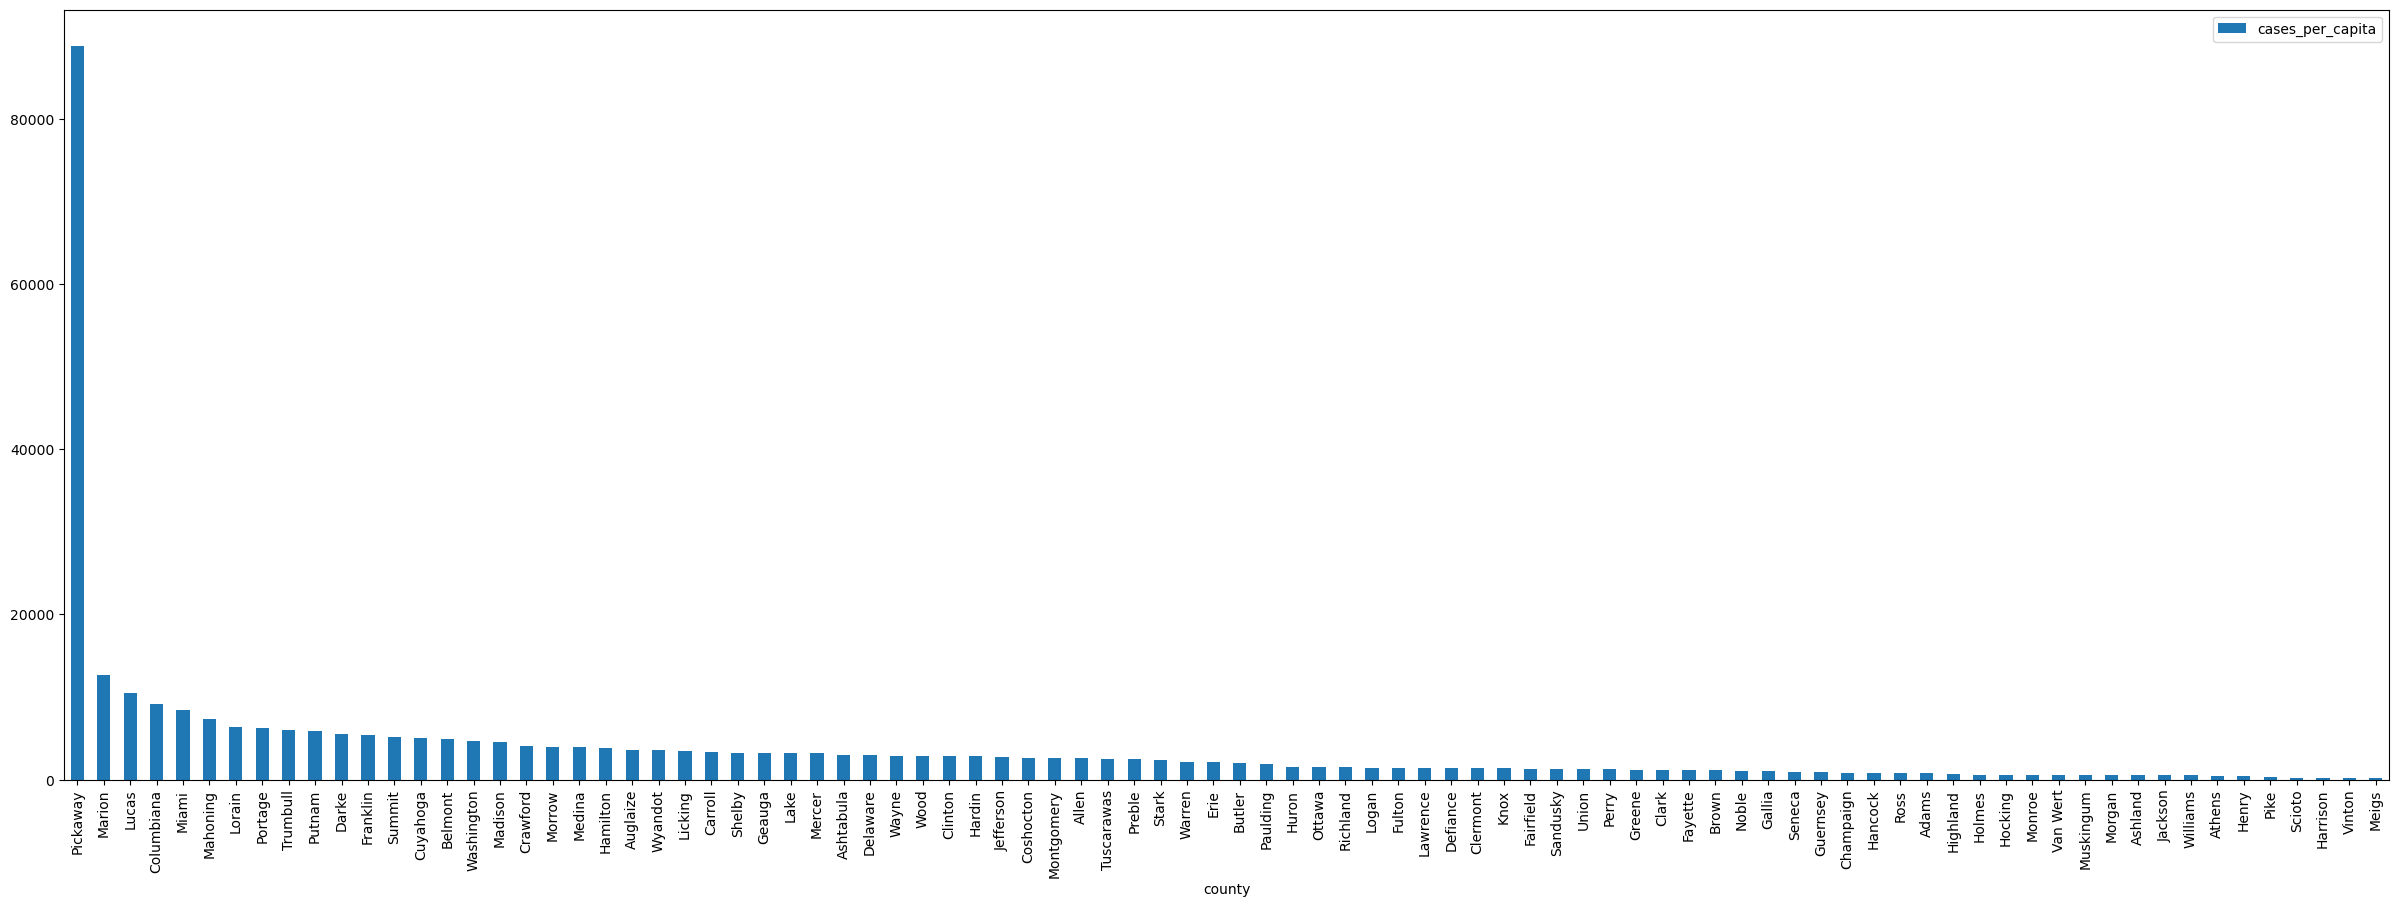

In [301]:
merged_data[['county', 'cases_per_capita']].sort_values(by='cases_per_capita', ascending=False).plot(kind='bar', x='county', y='cases_per_capita', figsize=(30, 10))
plt.xticks(rotation=90)
plt.show()

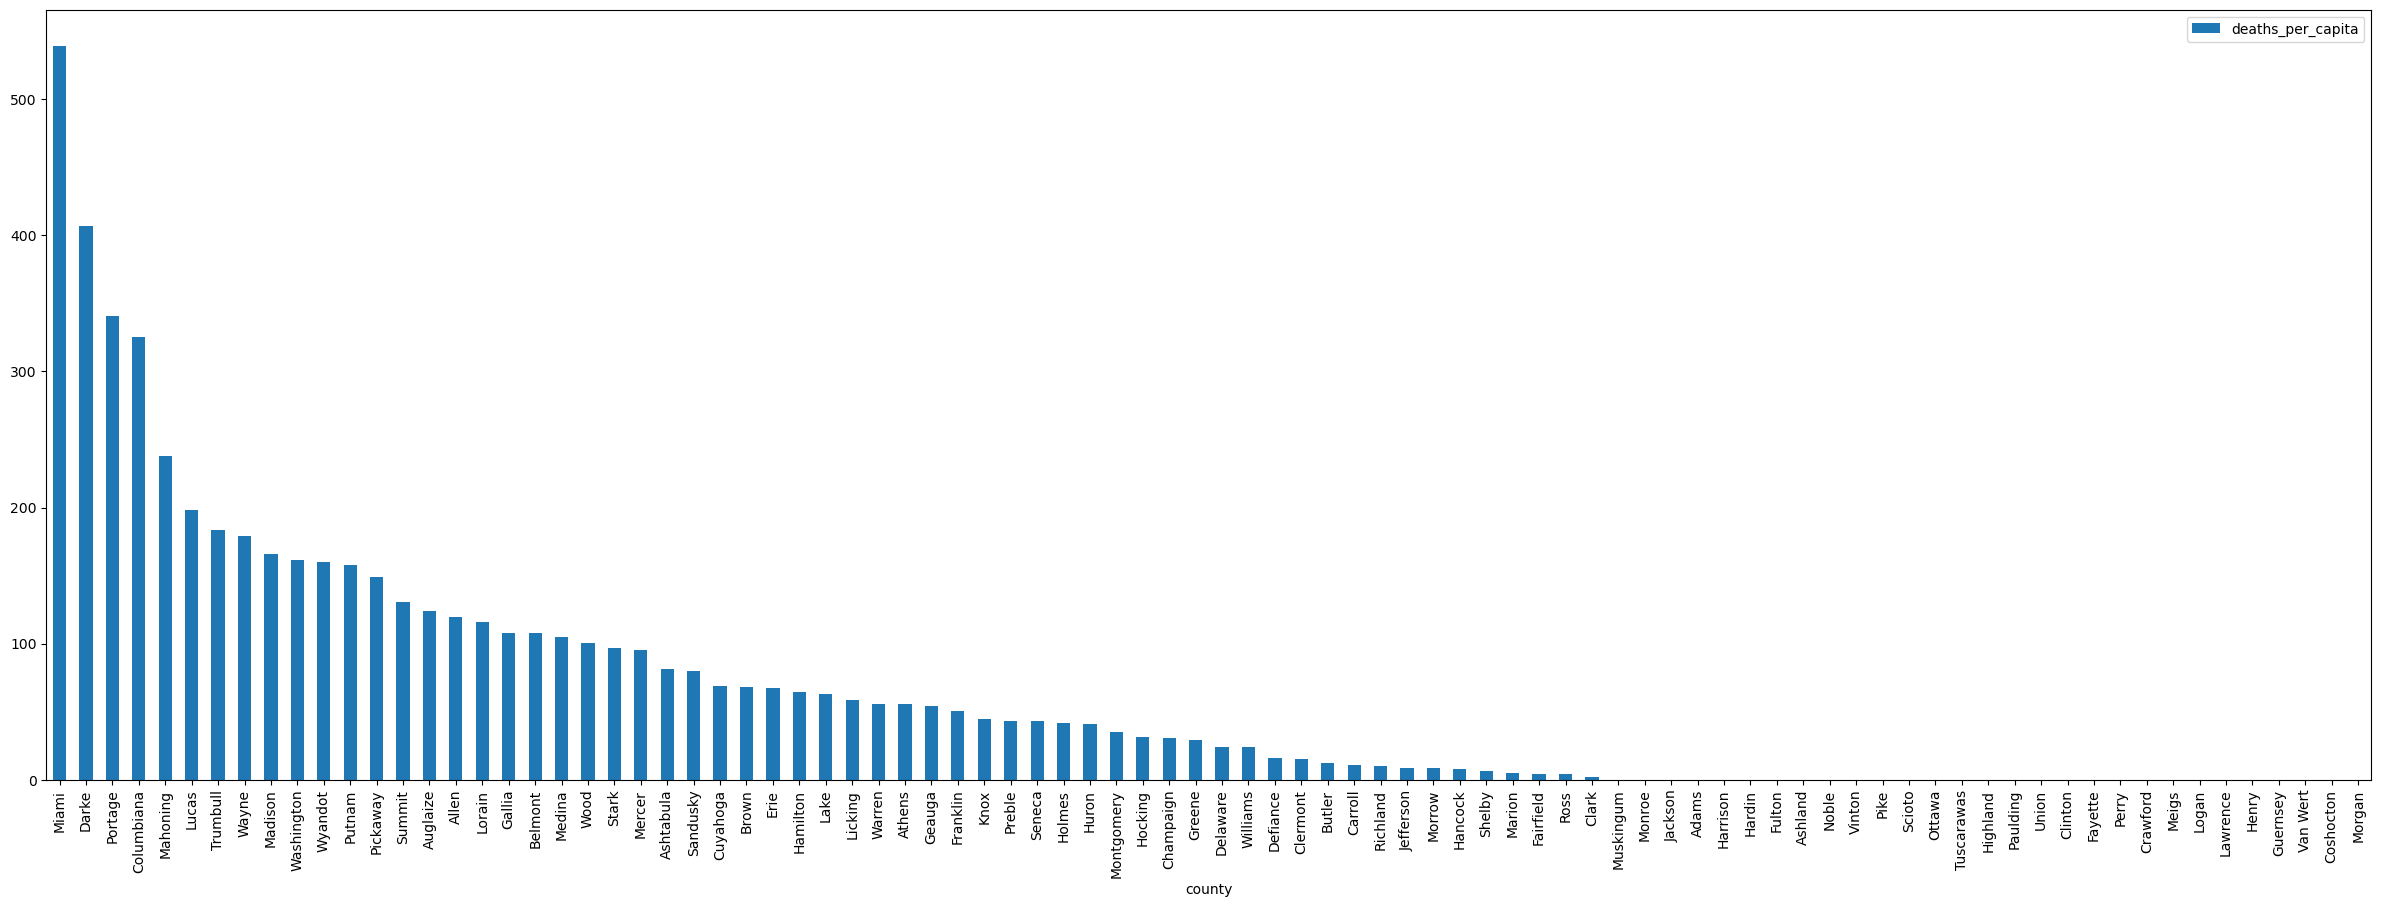

In [302]:
merged_data[['county', 'deaths_per_capita']].sort_values(by='deaths_per_capita', ascending=False).plot(kind='bar', x='county', y='deaths_per_capita', figsize=(30, 10))
plt.xticks(rotation=90)
plt.show()

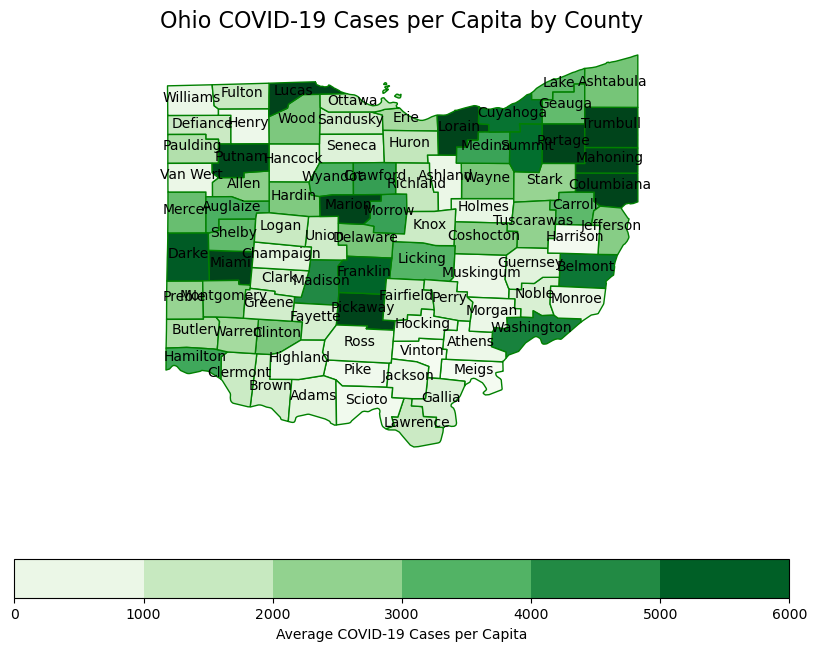

In [290]:
# Plot choropleth map
fig, ax = plt.subplots(figsize=(10, 8))
leg_min = 0
leg_max = 6000
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000]

merged_data.plot(column='cases_per_capita', cmap='Greens', ax=ax, legend=True, vmin=leg_min, vmax=leg_max, edgecolor='green',
                 legend_kwds={'label': "Average COVID-19 Cases per Capita", 'orientation': "horizontal", 'ticks': bins, 
                              'boundaries': bins})

merged_data.apply(lambda x: ax.annotate(text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)



# Add labels to the plot
ax.set_title('Ohio COVID-19 Cases per Capita by County', fontsize=16)
ax.axis('off')

plt.show()


In [329]:
#Top 5 counties with highest cases per capita
merged_data[['county', 'cases_per_capita']].sort_values(by='cases_per_capita', ascending=False).head(5)


,county,cases_per_capita
24,Pickaway,88758.736619
57,Marion,12600.275996
73,Lucas,10442.372800
44,Columbiana,9193.580345
6,Miami,8418.907039


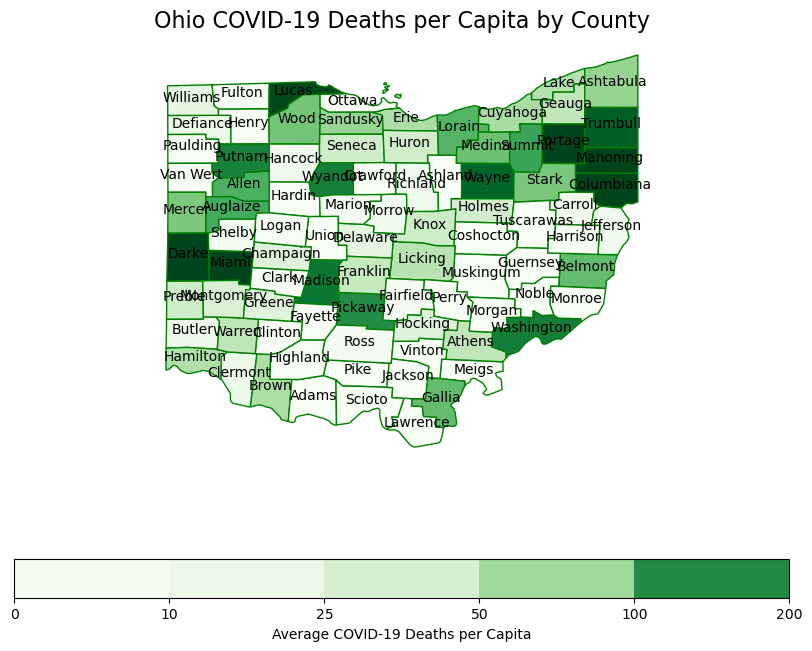

In [326]:
# Plot choropleth map
fig, ax = plt.subplots(figsize=(10, 8))
leg_min = 0
leg_max = 200
bins = [0,10,25, 50 ,100, 200]

merged_data.plot(column='deaths_per_capita', cmap='Greens', ax=ax, legend=True, vmin=leg_min, vmax=leg_max, edgecolor='green',
                 legend_kwds={'label': "Average COVID-19 Deaths per Capita", 'orientation': "horizontal", 'ticks': bins, 
                              'boundaries': bins})

merged_data.apply(lambda x: ax.annotate(text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)



# Add labels to the plot
ax.set_title('Ohio COVID-19 Deaths per Capita by County', fontsize=16)
ax.axis('off')

plt.show()


In [327]:
#Top 5 counties with highest  deaths per capita
merged_data[['county', 'deaths_per_capita']].sort_values(by='deaths_per_capita', ascending=False).head(5)


,county,deaths_per_capita
6,Miami,539.041897
46,Darke,406.830163
25,Portage,340.957522
44,Columbiana,325.511619
56,Mahoning,237.902366


## Internpretations - 

Below tables show the top 5 counties having highest number of cases per capita and death per capita

| County     | Cases per Capita |
|------------|-----------------|
| Pickaway   | 88758.736619    |
| Marion     | 12600.275996    |
| Lucas      | 10442.372800    |
| Columbiana | 9193.580345     |
| Miami      | 8418.907039     |

| County     | Deaths per Capita |
|------------|------------------|
| Miami      | 539.041897       |
| Darke      | 406.830163       |
| Portage    | 340.957522       |
| Columbiana | 325.511619       |
| Mahoning   | 237.902366       |

It is important to note that several factors, including population density, demographics, and healthcare resources, can influence the number of cases and deaths per capita in a county. The cases per capita have a high disparity among the counties. Pickaway can be said as a outlier as it has 7 times the cases of the next highest county. The north and eastern part of the states has a higher density of cases whereas the southern part is fairly isolated from the the high volume of cases. \
\
surprisingly, The the county with the most cases does not feature on the top 5 list of the counties with most deaths. The deaths per capita is the most for Miami county with 539 deaths per 100000 people with Darke and Portage following it. The Ohio state managed to have almost half of the counties perform excellent with virtually zero deaths per capita. 

## e

In [315]:
awareness_day = data.groupby('date_index_converted').mean().loc[:,['core_jaccard_normalized',
       'ideology_jaccard_normalized',
       'race_jaccard_normalized', 'economy_jaccard_normalized',
       'sports_jaccard_normalized', 'foreign_jaccard_normalized',
       'domestic_jaccard_normalized', 'nationalistic_jaccard_normalized',
       'politics_democratic_love_jaccard_normalized',
       'health_technology_jaccard_normalized', 'education_jaccard_normalized',
       'gender_jaccard_normalized', 'religion_jaccard_normalized',
       'social_jaccard_normalized',
       'politics_republican_love_jaccard_normalized',
       'politics_jaccard_normalized', 'entertainment_jaccard_normalized',
       'politics_republican_hate_jaccard_normalized',
       'politics_democratic_hate_jaccard_normalized',
       'health_jaccard_normalized', 'illness_jaccard_normalized']]
awareness_day.index = awareness_day.index.str.replace('day_', '').astype(int)
awareness_day = awareness_day.sort_values('date_index_converted')
awareness_day



,core_jaccard_normalized,ideology_jaccard_normalized,race_jaccard_normalized,economy_jaccard_normalized,sports_jaccard_normalized,foreign_jaccard_normalized,domestic_jaccard_normalized,nationalistic_jaccard_normalized,politics_democratic_love_jaccard_normalized,health_technology_jaccard_normalized,...,gender_jaccard_normalized,religion_jaccard_normalized,social_jaccard_normalized,politics_republican_love_jaccard_normalized,politics_jaccard_normalized,entertainment_jaccard_normalized,politics_republican_hate_jaccard_normalized,politics_democratic_hate_jaccard_normalized,health_jaccard_normalized,illness_jaccard_normalized
date_index_converted,,,,,,,,,,,,,,,,,,,,,
1,0.000007,0.000208,0.000000,0.006211,0.010840,0.000426,0.002583,0.004060,0.016869,0.001186,...,0.000573,0.007803,0.003742,0.004655,0.000438,0.005994,0.000333,0.000041,0.000000,0.000663
2,0.000000,0.000000,0.000000,0.006109,0.014642,0.000000,0.001323,0.000000,0.003711,0.000116,...,0.000000,0.006526,0.003498,0.000646,0.002933,0.012516,0.000080,0.000000,0.000000,0.000000
3,0.000006,0.000000,0.000030,0.006696,0.016295,0.005015,0.001789,0.005286,0.002438,0.001653,...,0.000860,0.002727,0.004590,0.004534,0.000381,0.014457,0.000733,0.004536,0.000000,0.002176
4,0.000008,0.000031,0.000000,0.005475,0.038437,0.005502,0.002235,0.000223,0.005051,0.000539,...,0.000865,0.006316,0.004976,0.003193,0.000679,0.023473,0.000257,0.000014,0.000000,0.000025
5,0.000000,0.000000,0.000721,0.002926,0.037963,0.011382,0.001961,0.005896,0.007442,0.000817,...,0.000131,0.017044,0.004403,0.004977,0.001508,0.008791,0.001804,0.006810,0.001768,0.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.007430,0.000000,0.000000,0.002639,0.076660,0.001890,0.003026,0.000238,0.003467,0.000739,...,0.005977,0.000956,0.003685,0.004559,0.001898,0.008560,0.002557,0.000000,0.000000,0.005987
116,0.006253,0.000000,0.000000,0.000687,0.028453,0.026784,0.000892,0.000166,0.000892,0.000309,...,0.000236,0.004455,0.001839,0.000066,0.000304,0.014504,0.006649,0.000000,0.000000,0.009238
117,0.013471,0.004765,0.000000,0.002744,0.012476,0.000915,0.000456,0.038528,0.000300,0.001820,...,0.000403,0.005835,0.003043,0.014588,0.000016,0.014805,0.000000,0.038462,0.000000,0.013318


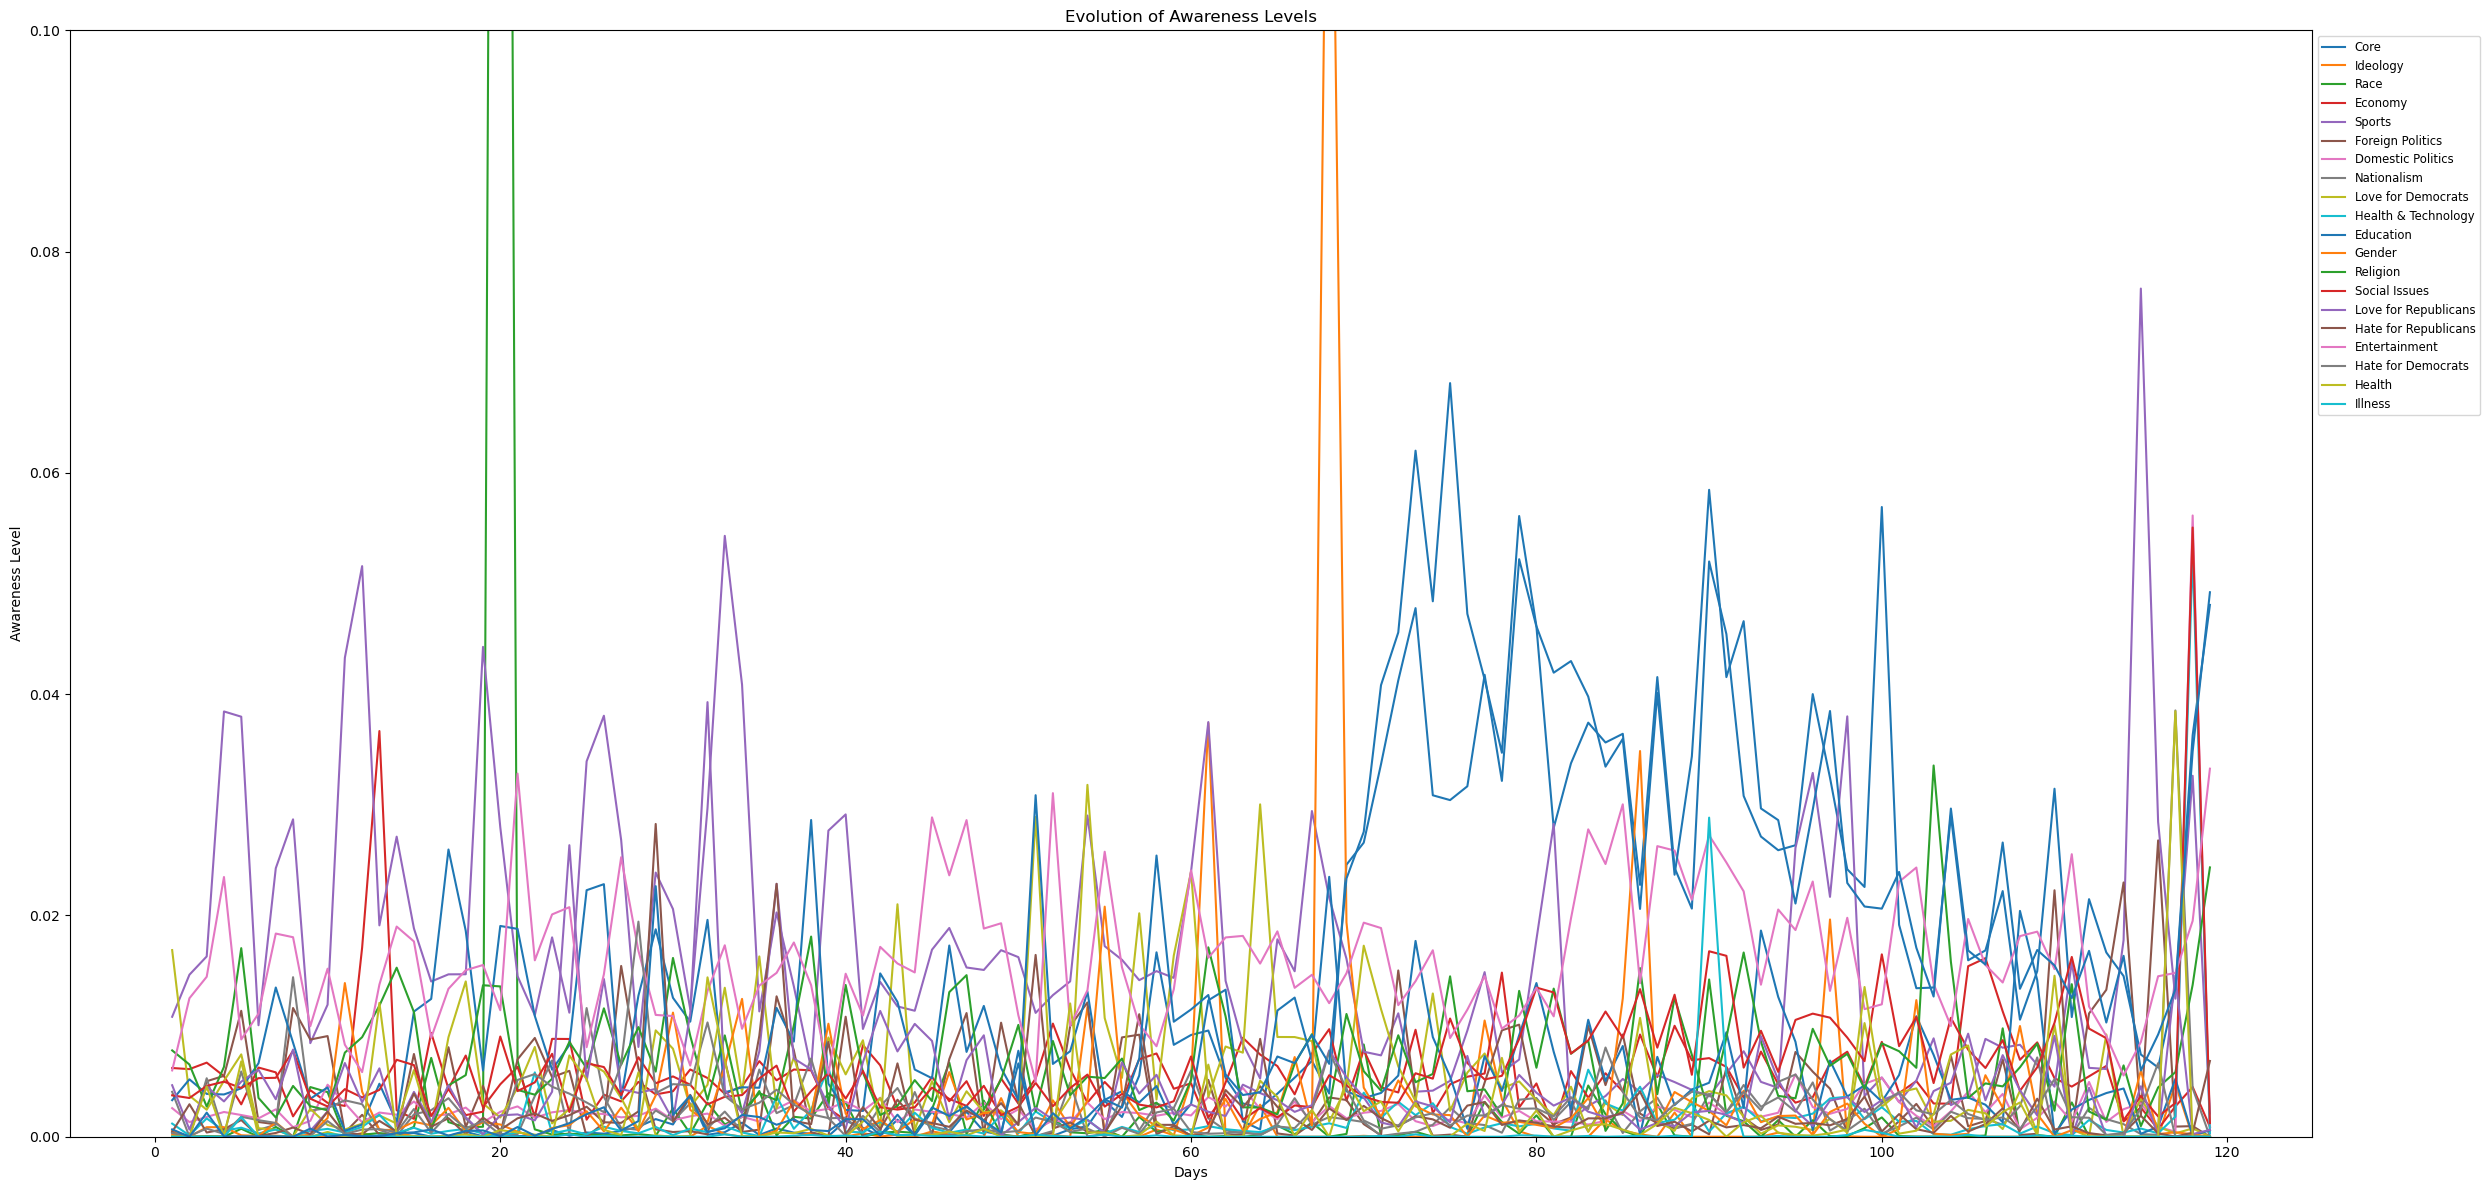

In [316]:
# Define figure size
fig_size = (25, 12)

# Create figure object and set its size
fig = plt.figure(figsize=fig_size)

# Get list of column names
column_names = awareness_day.columns

# Plot each column as a separate line
for col in column_names:
    plt.plot(awareness_day.index, awareness_day[col], label=col)

# Set X and Y axis labels
plt.xlabel('Days')
plt.ylabel('Awareness Level')

# Set chart title
plt.title('Evolution of Awareness Levels')

# Add legend and set its location
legend_labels = ['Core', 'Ideology', 'Race', 'Economy', 'Sports', 'Foreign Politics', 'Domestic Politics', 'Nationalism', 'Love for Democrats', 'Health & Technology', 'Education', 'Gender', 'Religion', 'Social Issues', 'Love for Republicans', 'Hate for Republicans', 'Entertainment', 'Hate for Democrats', 'Health', 'Illness']
plt.legend(labels=legend_labels, loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize='small')

# Adjust plot to fit the figure
plt.tight_layout()

# Set Y axis limits
plt.ylim(top=0.10, bottom=0.00)

# Show the plot
plt.show()


 ## Interpretations -
The multiple line graph presents a awareness of myriad topics and they are shown as time-serier plot to interpret the evolution of topic as the society move ahead in the covid pandemic. the topics are labelled manually from the twitts are scored based on Jaccard similarity measure. The topics ranges from general covid-19 awareness to social and political events as seen in the legend table. This data makes a interesting societal commentry on how certain topics gain traction and how can a global pandemic can affect those.\
\
The initial period sees topics related to Entertainment, Religion and Sports being widely discussed and trump any other discussion on social media. The core i.e. the general covid-19 awareness remains bare minimum. The later part of time series plot , as the cases start to rise ,is highly concentrated on topics of health, health technology and general covid-19 awareness. The political discussion around support and dislike towards political parties remains highly volatile throughout the period.
 